# Simple Image Classifier - 一个简单的图像分类器

First, let's try out the Jupyter notebook.

In [8]:
print("Hello jupyter notebook!")

Hello jupyter notebook!


## Import libraries

Here, we are going to need 3 librarys:

- TensorFlow (And Keras): our neural network framework
- Numpy: imports and deals with our datasets
- Matplotlib: plot our results out for us

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Helper libs
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Import MNIST fashion dataset

We will be building a image classifier for the MNIST fashion dataset. We need to first import the dataset as our network's input.

Also, our network will classify the images into categories referenced as 0 to 9. We will name our categories here.

In [ ]:
# Import MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's take a look at out training data and our test images.

In [9]:
print("Train images:", train_images.shape, len(train_labels), train_labels)
print("Test  images:", test_images.shape, len(test_images), test_labels)

Train images: (60000, 28, 28) 60000 [9 0 0 ... 3 0 5]
Test  images: (10000, 28, 28) 10000 [9 2 1 ... 8 1 5]


As we can see, there are 60000 images in the training data, with 60000 labels to them. There's 10000 test images for us to evaluate our trained model.

Let's see the first image of the dataset:

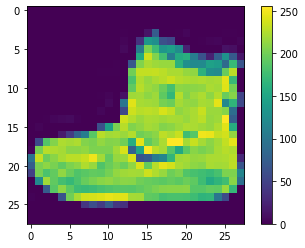

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

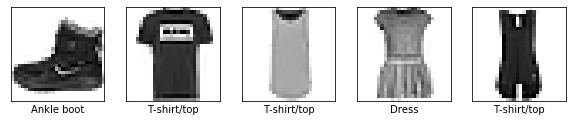

In [11]:
# Convert the pixels to a range of (0, 1)
train_images = train_images / 255
test_images = test_images / 255

# Check the conversion
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building and training the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4972 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3720 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3353 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3117 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2931 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2833 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2679 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2591 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2487 - accuracy: 0.9071
Epoch 10

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

model.summary()

10000/1 - 1s - loss: 0.2254 - accuracy: 0.8763

Test accuracy: 0.8763
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Predictions

In [14]:
predictions = model.predict(test_images)

print("Prediction:", class_names[np.argmax(predictions[0])])
print("Truth:", class_names[test_labels[0]])

Prediction: Ankle boot
Truth: Ankle boot


In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

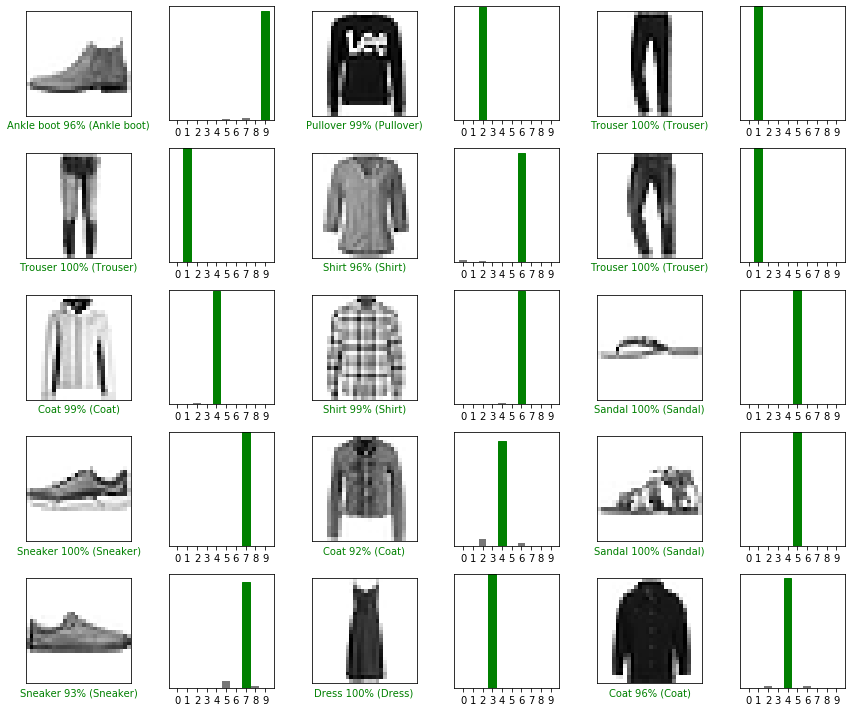

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()